In [31]:
import csv
import re

def parse_chatbot_entries(file_path, output_csv):
    data = [] ##All data
    entry = {} # one line
    message_lines = [] # message
    
    expected_fields = ["Name", "Email", "Location","Branch" ,"Party Size", "Date", "Time", "Message"]
    
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        
        for i, line in enumerate(lines):
            line = line.strip()
            ## Loop for start and finish an entry 
            if line.startswith("Name:"):
                if entry and "Name" in entry:  # Save only if an entry was started
                    data.append(entry)
                entry = {field: "" for field in expected_fields}  #  only expected fields 
                entry["Name"] = line.replace("Name:", "").strip() #remove the column from the data
            elif line.startswith("Email:"):
                entry["Email"] = line.replace("Email:", "").strip()
            elif line.startswith("Location:"):
                entry["Location"] = line.replace("Location:", "").strip()
            elif line.startswith("Branch:"):
                entry["Branch"] = line.replace("Branch:", "").strip()    
            elif line.startswith("Party Size:"):
                entry["Party Size"] = line.replace("Party Size:", "").strip()
            elif line.startswith("Date:"):
                entry["Date"] = line.replace("Date:", "").strip()
            elif line.startswith("Time:"):
                entry["Time"] = line.replace("Time:", "").strip()
                data.append(entry)  # Save entry as all fields are processed
                entry = {} # reset entry As time is always the last
            elif line.startswith("Message:"):        
                message_lines = [line.replace("Message:", "").strip()]
            elif line == "on":
                continue  # Ignore "on" 
            elif line == "---":  ## join the message when find ---
                if message_lines: 
                    entry["Message"] = " ".join(message_lines)
                message_lines = []  # Reset message lines
            else:
                if message_lines is not None: ## if not message apend "" the line with nothing
                    message_lines.append(line)
    
    if entry and "Name" in entry:  # Save last entry in data 
        data.append(entry)
    
    # Writing to CSV
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=expected_fields)
        writer.writeheader()
        writer.writerows(data)
    
    print(f"CSV file '{output_csv}' successfully created!")

# Example usage:

parse_chatbot_entries('mailsinfo-chatbot.txt', 'chatbot_data.csv')


CSV file 'chatbot_data.csv' successfully created!


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
chatbot_df = pd.read_csv('chatbot_data.csv')


In [131]:

# Remove "Woodfire and Wings" 
chatbot_df["Branch"] = chatbot_df["Branch"].str.replace("Woodfire and Wings", "", regex=False).str.strip()

# Merge "Branch" into "Location" if "Location" 
chatbot_df["Location"] = chatbot_df["Location"].fillna(chatbot_df["Branch"])

# Drop  "Branch" 
chatbot_df = chatbot_df.drop(columns=["Branch"])





In [135]:



#  'Time' to datetime format
chatbot_df["Time"] = pd.to_datetime(chatbot_df["Time"], format="%I:%M %p", errors='coerce')


valid_times = chatbot_df.loc[81:, "Time"].dropna()

# Randomly assign times
chatbot_df.loc[:79, "Time"] = np.random.choice(valid_times, size=80, replace=True)

# Convert back 
chatbot_df["Time"] = chatbot_df["Time"].dt.strftime("%I:%M %p")

chatbot_df.to_csv('chatbot_data_cleaned.csv', index=False)
chatbot_df.tail(99)



,Name,Email,Location,Party Size,Date,Time,Message
254,Darragh Murphy,darraghmurphy22@gmail.com,Tallaght,NaN,"November 19, 2024",07:26 AM,"Order number 72086044. Hi Team, Normally I am ..."
255,Ben Fitzgerald,benfitzgerald159@gmail.com,Tallaght,NaN,"November 18, 2024",11:21 PM,I am currently looking for a part time job and...
256,John Horan,jhoran12543@gmail.com,Stillorgan,21.0,"November 18, 2024",08:31 PM,From 2:30-4:30 for food and some drinks
257,Niall Mc Dermott,McDermott.n@gmail.com,Stillorgan,NaN,"November 18, 2024",04:36 PM,I am looking to book a table for 6.45pm this e...
258,Robert Dillon,bobdillon1409@gmail.com,Clondalkin,NaN,"November 17, 2024",08:43 PM,"Hey there’s how’s things , I made an order the..."
...,...,...,...,...,...,...,...
348,Alice,alicedodrill@gmail.com,NaN,NaN,"October 4, 2024",07:02 AM,I received an order last night from you but be...
349,Cliodhna Mac Cabe,cliodhnamaccabe@hotmail.com,NaN,NaN,"October 3, 2024",03:17 PM,Hi all I am reaching out on behalf of the Tho...
350,Ciara Murray,ciaramurray2001@hotmail.com,NaN,NaN,"October 2, 2024",09:32 PM,"Hi, I’ve just ordered a delivery from you. I o..."
351,anita,anitagill08@hotmail.com,NaN,NaN,"October 1, 2024",05:04 PM,hello Could I please reserve a table for 10 fo...


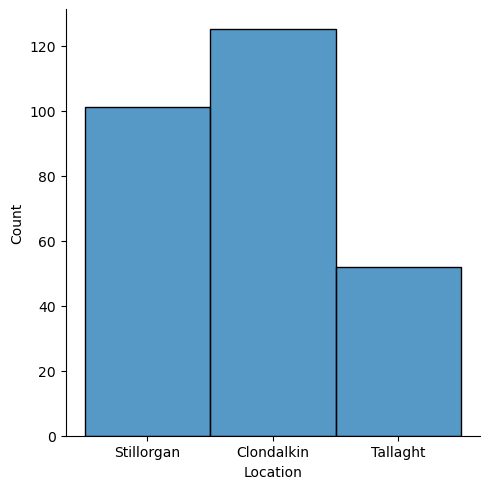

In [143]:
sns.displot(chatbot_df['Location'])

In [293]:
chatbot_df = pd.read_csv('chatbot_data_cleaned.csv')
chatbot_df["Time"] = pd.to_datetime(chatbot_df["Time"], format="%I:%M %p", errors='coerce')
chatbot_df["Time"] = chatbot_df["Time"].dt.strftime("%I:%M %p")


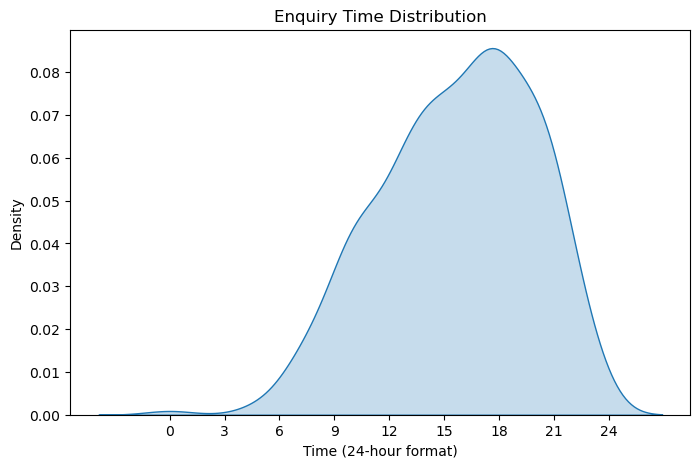

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# format 24 hours
chatbot_df["Time"] = pd.to_datetime(chatbot_df["Time"], format="%I:%M %p", errors='coerce')
chatbot_df["Time"] = chatbot_df["Time"].dt.hour  # Extract only the hour (0-23)

# Plot the KDE distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(chatbot_df['Time'], fill=True)


plt.xticks(range(0, 25, 3)) 
plt.xlabel("Time (24-hour format)")
plt.ylabel("Density")
plt.title("Enquiry Time Distribution")

plt.show()


<Figure size 1200x600 with 0 Axes>

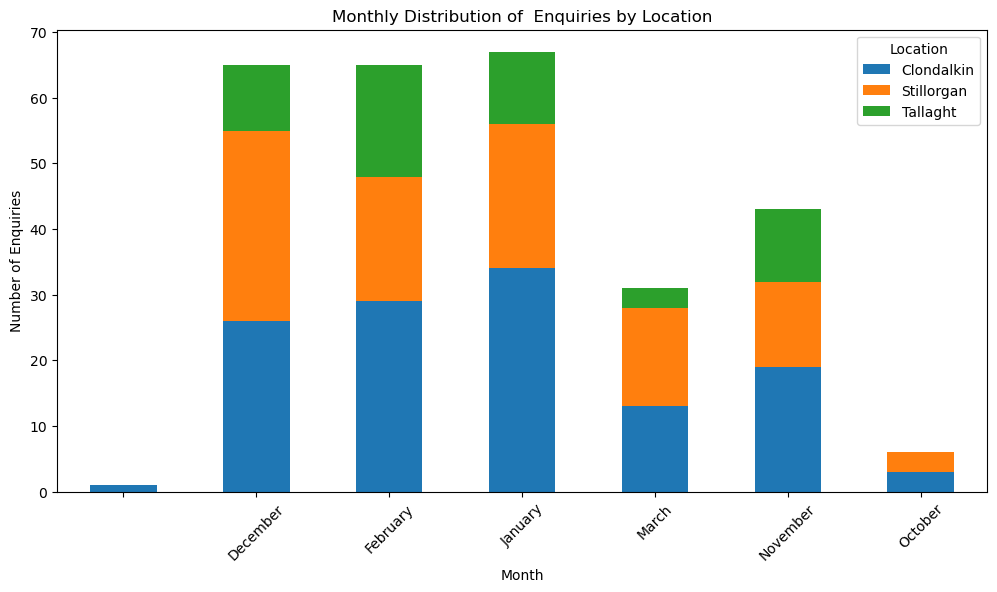

In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


chatbot_df["Date"] = pd.to_datetime(chatbot_df["Date"], errors="coerce")

# Extract Year, Month, Day, and Weekday
chatbot_df["Year"] = chatbot_df["Date"].dt.year
chatbot_df["Month"] = chatbot_df["Date"].dt.month
chatbot_df["Day"] = chatbot_df["Date"].dt.day
chatbot_df["Weekday"] = chatbot_df["Date"].dt.day_name()  # Get full weekday name

# Convert Month number to Month name 
chatbot_df["Month"] = chatbot_df["Month"].fillna(0).astype(int)
chatbot_df["Month"] = chatbot_df["Month"].apply(lambda x: calendar.month_name[x])

# Group by Month and Location, and count the number of enquiries for each combination
monthly_counts = chatbot_df.groupby(["Month", "Location"]).size().reset_index(name="EnquiryCount")

# Pivot the table to have a count of enquiries per month and location
monthly_counts_pivot = monthly_counts.pivot_table(index="Month", columns="Location", values="EnquiryCount", aggfunc="sum", fill_value=0)

# Plotting a Stacked Bar Plot 
plt.figure(figsize=(12, 6))
monthly_counts_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))

# 
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Enquiries")
plt.title("Monthly Distribution of  Enquiries by Location")
plt.legend(title="Location", loc="upper right")

plt.show()


C:\Users\Acer Nitro\AppData\Local\Temp\ipykernel_6592\1459805333.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  weekday_counts_pivot = weekday_counts.pivot_table(index="Weekday", columns="Location", values="EnquiryCount", aggfunc="sum", fill_value=0)


<Figure size 1200x600 with 0 Axes>

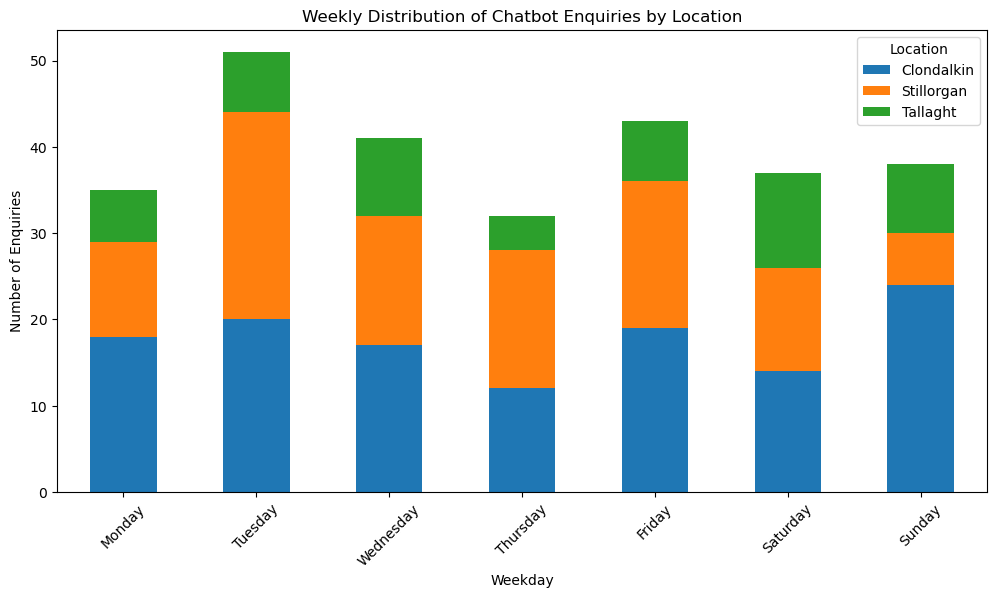

In [311]:
weekday_counts = chatbot_df.groupby(["Weekday", "Location"]).size().reset_index(name="EnquiryCount")


weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts["Weekday"] = pd.Categorical(weekday_counts["Weekday"], categories=weekday_order, ordered=True)

# Pivot the table to have a count of enquiries per weekday and location
weekday_counts_pivot = weekday_counts.pivot_table(index="Weekday", columns="Location", values="EnquiryCount", aggfunc="sum", fill_value=0)

# Stacked bar
plt.figure(figsize=(12, 6))
weekday_counts_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))

plt.xticks(rotation=45)
plt.xlabel("Weekday")
plt.ylabel("Number of Enquiries")
plt.title("Weekly Distribution of Chatbot Enquiries by Location")
plt.legend(title="Location", loc="upper right")

plt.show()

Location,Clondalkin,Stillorgan,Tallaght
Month,,,
,1,0,0
December,26,29,10
February,29,19,17
January,34,22,11
March,13,15,3
November,19,13,11
October,3,3,0


In [305]:
chatbot_df

,Name,Email,Location,Party Size,Date,Time,Message,Year,Month,Day,Weekday
0,Joe Barcoe,jobarcoe@gmail.com,Stillorgan,30.0,2025-03-11,10,"Hi, I hope you are having a lovely week so far...",2025.0,March,11.0,Tuesday
1,Katherine Beirne,Katherineb19@gmail.com,Clondalkin,NaN,2025-03-22,18,Could we get a wee dessert with a sparkler aft...,2025.0,March,22.0,Saturday
2,Roxanne vella,boxey12@gmail.com,Stillorgan,NaN,2025-03-10,15,Hi just wondering would the restaurant be able...,2025.0,March,10.0,Monday
3,Andrew Wade,Andy.f.wade@gmail.com,Clondalkin,NaN,2025-03-17,10,"Hi There, Myself and my wife (Liz Wade 086 842...",2025.0,March,17.0,Monday
4,Michele O'Riordan,shell.oriordan@gmail.com,Stillorgan,NaN,2025-03-09,21,"Hi, I think I placed a booking this morning fo...",2025.0,March,9.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
348,Alice,alicedodrill@gmail.com,NaN,NaN,2024-10-04,7,I received an order last night from you but be...,2024.0,October,4.0,Friday
349,Cliodhna Mac Cabe,cliodhnamaccabe@hotmail.com,NaN,NaN,2024-10-03,15,Hi all I am reaching out on behalf of the Tho...,2024.0,October,3.0,Thursday
350,Ciara Murray,ciaramurray2001@hotmail.com,NaN,NaN,2024-10-02,21,"Hi, I’ve just ordered a delivery from you. I o...",2024.0,October,2.0,Wednesday
351,anita,anitagill08@hotmail.com,NaN,NaN,2024-10-01,17,hello Could I please reserve a table for 10 fo...,2024.0,October,1.0,Tuesday


In [313]:

# Count 
email_counts = chatbot_df['Email'].value_counts()

# Filter for emails appereance
recurrent_clients = email_counts[email_counts >= 2]

# Create a DataFrame 
recurrent_clients_df = pd.DataFrame(recurrent_clients).reset_index()
recurrent_clients_df.columns = ['Email', 'Occurrences']

# csv
recurrent_clients_df.to_csv('recurrent_clients.csv', index=False)

print(recurrent_clients_df)


                          Email  Occurrences
0        margiekerins@gmail.com            5
1            stacyquinn@live.ie            3
2        chapmanjohnw@gmail.com            3
3          Sjscully@yahoo.co.uk            2
4        jenniferg977@gmail.com            2
5     cherylwilson151@gmail.com            2
6    eimearwhelan1505@gmail.com            2
7    mayres@spiritmotorgroup.ie            2
8    sean.langan@dublinmaths.ie            2
9                giller@live.ie            2
10      gilly.andorra@gmail.com            2
11      rachelbrady93@gmail.com            2
12       alannaghmcm2@gmail.com            2
13         patlcullen@gmail.com            2
14     niamhyscully@yahoo.co.uk            2
15        anitak158@hotmail.com            2
16       ayshibijoy04@gmail.com            2
17  roisin.ohuadhaigh@gmail.com            2
18   Arlenekavanagh@yahoo.co.uk            2
19       Katherineb19@gmail.com            2
20    eimspillage00@hotmail.com            2
21       n

In [137]:
text = "I ordered tonight for the first time since May and can’t get over the drop in quality and portion size of the food. I spent €65 feeding 4 people which I normally would justify for good food but what I received was far below average. Feel free to contact me about this disappointing order"

In [73]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

## NLTK library for NLP 
## Segmentation
## Tokenizing
## Stop words
## Stemming 
## Lemmatization
## Speech Tagging
## Named Entity Tagging
## Reference : https://www.youtube.com/watch?v=MpIagClRELI

[nltk_data] Downloading package punkt to C:\Users\Acer
[nltk_data]     Nitro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [77]:
#Segmentation
seg_sentences = sent_tokenize(text)
seg_sentences

['I ordered tonight for the first time since May and can’t get over the drop in quality and portion size of the food.',
 'I spent €65 feeding 4 people which I normally would justify for good food but what I received was far below average.',
 'Feel free to contact me about this disappointing order']

In [79]:
seg_sentences[1]

'I spent €65 feeding 4 people which I normally would justify for good food but what I received was far below average.'

In [85]:
text = re.sub(r"[^a-zA-Z0-9]", " ", seg_sentences[1])
text

'I spent  65 feeding 4 people which I normally would justify for good food but what I received was far below average '

In [87]:
# Tokenizing
from nltk.tokenize import word_tokenize


In [89]:
words = word_tokenize(text)
print (words)

['I', 'spent', '65', 'feeding', '4', 'people', 'which', 'I', 'normally', 'would', 'justify', 'for', 'good', 'food', 'but', 'what', 'I', 'received', 'was', 'far', 'below', 'average']


In [91]:
#### Removal of Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Acer
[nltk_data]     Nitro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [93]:
words = [w for w in words if w not in stopwords.words("english")]
print (words)

['I', 'spent', '65', 'feeding', '4', 'people', 'I', 'normally', 'would', 'justify', 'good', 'food', 'I', 'received', 'far', 'average']


In [97]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [99]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Acer
[nltk_data]     Nitro\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\Acer
[nltk_data]     Nitro\AppData\Roaming\nltk_data...


True

In [103]:
## Stemming 
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print (stemmed)

['i', 'spent', '65', 'feed', '4', 'peopl', 'i', 'normal', 'would', 'justifi', 'good', 'food', 'i', 'receiv', 'far', 'averag']


In [105]:
## Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

##
lemmatized= [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmatized)


['I', 'spent', '65', 'feeding', '4', 'people', 'I', 'normally', 'would', 'justify', 'good', 'food', 'I', 'received', 'far', 'average']


In [115]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Acer Nitro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Acer
[nltk_data]     Nitro\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [117]:
from nltk import pos_tag

In [119]:
pos_tag(words)

[('I', 'PRP'),
 ('spent', 'VBD'),
 ('65', 'CD'),
 ('feeding', 'VBG'),
 ('4', 'CD'),
 ('people', 'NNS'),
 ('I', 'PRP'),
 ('normally', 'RB'),
 ('would', 'MD'),
 ('justify', 'VB'),
 ('good', 'JJ'),
 ('food', 'NN'),
 ('I', 'PRP'),
 ('received', 'VBD'),
 ('far', 'RB'),
 ('average', 'JJ')]

In [123]:
##Named entity recognition

from nltk import ne_chunk
nltk.download('words')

[nltk_data] Downloading package words to C:\Users\Acer
[nltk_data]     Nitro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [127]:
ner_tree = ne_chunk(pos_tag(word_tokenize(seg_sentences[0])))
print(ner_tree)

(S
  I/PRP
  ordered/VBD
  tonight/NN
  for/IN
  the/DT
  first/JJ
  time/NN
  since/IN
  May/NNP
  and/CC
  can/MD
  ’/VB
  t/JJ
  get/NN
  over/IN
  the/DT
  drop/NN
  in/IN
  quality/NN
  and/CC
  portion/NN
  size/NN
  of/IN
  the/DT
  food/NN
  ./.)
